# **APS1080: Introduction to Reinforcement Learning**
---

**Student Name**: 

---



**Student ID:** 

---
**Exercise IV**: Function Approximation


------

You will use function approximation to device controllers for the mountain car and/or cart pole problems in Assignment IV.

Rather than code a function approximation class (straightforward but outside of the scope of our course), you'll use a library, TensorFlow, for this.

There are two front ends for TensorFlow that make it easier to construct, debug, etc., neural networks (general nonlinear function approximation structures): Keras (keras.io) and TfLearn (tflearn.org).

Consult the documentation for these two (either, your choice) and learn how to:

Construct a neural network with several layers
Obtain the gradient of the neural network with respect to its parameters
Train the neural network by stochastic gradient descent using a loop that you construct and in which you update the weights as per the gradient and the error (you will use this in A-IV)

In [30]:
import numpy as np  # Library for numerical operations
import tensorflow as tf  # TensorFlow library
import keras  # neural networks API

from matplotlib import pyplot as plt # Library for plotting
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

----
## **Construct a neural network with several layers**

In [31]:
class CustomNeuralNetwork:
    def __init__(self, p_inputSpace=1, p_outputSpace=1, hidden_units=64):
        # Initialize parameters
        # Dimensionality of the input space
        self.p_inputSpace = p_inputSpace

         # Dimensionality of the output space
        self.p_outputSpace = p_outputSpace

        # Number of units in each hidden layer
        self.hidden_units = hidden_units

        # Build the neural network model
        self.build_model()

    def build_model(self):
        # Define input layer with specified input space dimension
        inputs = keras.Input(shape=(self.p_inputSpace,), name="states")

        # First hidden layer with ReLU activation and specified number of units
        x1 = Dense(self.hidden_units, activation='relu')(inputs)

        # Second hidden layer with ReLU activation and specified number of units
        x2 = Dense(self.hidden_units, activation='relu')(x1)

        # Output layer with linear activation and specified output space dimension
        outputs = Dense(self.p_outputSpace, name="actions")(x2)

        # Create the Keras Model using Functional API
        self.model = keras.Model(inputs=inputs, outputs=outputs)

# Example Test:
custom_model = CustomNeuralNetwork(p_inputSpace=1, p_outputSpace=1, hidden_units=64)

# Print the summary
custom_model.model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 states (InputLayer)         [(None, 1)]               0         
                                                                 
 dense_16 (Dense)            (None, 64)                128       
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 actions (Dense)             (None, 1)                 65        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
## **Obtain the gradient of the neural network with respect to its parameters**

In [32]:
# Example data
x = tf.random.normal(shape=(1, 1))

# Compute gradients using GradientTape
with tf.GradientTape() as tape:
    predictions = custom_model.model(x)
gradients = tape.gradient(predictions, custom_model.model.trainable_variables)

# Print some of the gradients
print("Gradients for first layer weights:")
print(gradients[0])  # Assuming gradients[0] corresponds to the first layer's weights


Gradients for first layer weights:
tf.Tensor(
[[ 0.          0.1222241   0.          0.22733578 -0.09538677 -0.07672296
  -0.13687123  0.          0.18984254  0.          0.09961198  0.24773592
   0.          0.          0.07323691  0.          0.         -0.14498492
   0.19220784  0.          0.          0.17748906  0.          0.09054417
   0.          0.          0.10790931  0.          0.         -0.22061971
   0.          0.11260959  0.3513683  -0.0727589   0.         -0.4970609
   0.30304623  0.          0.          0.          0.10007786  0.
   0.         -0.00456371  0.1655031  -0.08587494 -0.20636661  0.
   0.          0.          0.20579314  0.          0.11837491  0.3556263
   0.20862207  0.          0.          0.          0.01538355  0.24211682
  -0.08633793  0.          0.          0.        ]], shape=(1, 64), dtype=float32)


---

## **Train the neural network by stochastic gradient descent using a loop that you construct and in which you update the weights as per the gradient and the error**

In [33]:
# Instantiate the CustomNeuralNetwork class
custom_model = CustomNeuralNetwork(p_inputSpace=1, p_outputSpace=1, hidden_units=64)

# Optimizer and loss function
alpha = 0.001
optimizer = keras.optimizers.SGD(learning_rate=alpha)
f_ppError = keras.losses.MeanSquaredError()

# Training data
train = np.array([[-2, -10], [-1, -5], [0, 0], [1, 5], [2, 10]])
x_train = train[:, 0]
y_train = train[:, 1]
batch_size = 1
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

epochs = 40

# Training loop
for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()

    # Iterate over batches
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            predictions = custom_model.model(x_batch_train, training=True)
            ppError = f_ppError(y_batch_train, predictions)
        grads = tape.gradient(ppError, custom_model.model.trainable_weights)
        optimizer.apply_gradients(zip(grads, custom_model.model.trainable_weights))

        # Print batch error
        if step % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Batch {step + 1}, Error: {float(ppError):.4f}")


Epoch 1/40, Batch 1, Error: 23.1315
Epoch 2/40, Batch 1, Error: 99.7731
Epoch 3/40, Batch 1, Error: 24.0403
Epoch 4/40, Batch 1, Error: 23.2465
Epoch 5/40, Batch 1, Error: 22.4342
Epoch 6/40, Batch 1, Error: 18.9320
Epoch 7/40, Batch 1, Error: 17.9196
Epoch 8/40, Batch 1, Error: 70.2815
Epoch 9/40, Batch 1, Error: 18.7538
Epoch 10/40, Batch 1, Error: 60.8760
Epoch 11/40, Batch 1, Error: 12.5431
Epoch 12/40, Batch 1, Error: 0.0172
Epoch 13/40, Batch 1, Error: 9.3296
Epoch 14/40, Batch 1, Error: 7.7127
Epoch 15/40, Batch 1, Error: 6.1075
Epoch 16/40, Batch 1, Error: 38.8221
Epoch 17/40, Batch 1, Error: 20.2342
Epoch 18/40, Batch 1, Error: 2.1749
Epoch 19/40, Batch 1, Error: 11.3670
Epoch 20/40, Batch 1, Error: 0.7115
Epoch 21/40, Batch 1, Error: 0.0058
Epoch 22/40, Batch 1, Error: 3.8870
Epoch 23/40, Batch 1, Error: 0.1999
Epoch 24/40, Batch 1, Error: 1.7768
Epoch 25/40, Batch 1, Error: 0.0026
Epoch 26/40, Batch 1, Error: 0.0056
Epoch 27/40, Batch 1, Error: 0.0813
Epoch 28/40, Batch 1, E

2/2 [==============================] - 0s 6ms/step


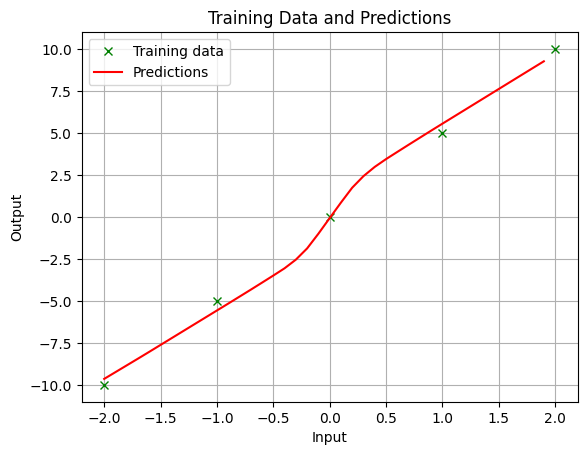

In [34]:
# Generate predictions for plotting
D = np.arange(-2, 2, 0.1)
R = custom_model.model.predict(D)

# Plotting
plt.figure()
plt.plot(x_train, y_train, 'gx', label='Training data')
plt.plot(D, R, 'r-', label='Predictions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Training Data and Predictions')
plt.legend()
plt.grid()
plt.show()

In [35]:
!jupyter nbconvert --to html /content/Exercise_IV_Function_Approximation.ipynb

[NbConvertApp] Converting notebook /content/Exercise_IV_Function_Approximation.ipynb to html
[NbConvertApp] Writing 649681 bytes to /content/Exercise_IV_Function_Approximation.html
